In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read data

In [2]:
data = pd.read_csv("training_results.csv")

In [3]:
data

,Unnamed: 0,index,Unnamed: 0.1,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,...,info/learner/default/global_value,info/learner/default/adv,info/learner/default/adv_nei,info/learner/default/adv_global,info/learner/default/adv_diff_mean,info/learner/default/adv_diff_min,info/learner/default/adv_diff_max,info/learner/default/svo_std,info/learner/default/svo_std_param,info/learner/default/environment_used_svo
0,0,0,0,NaN,NaN,NaN,NaN,0.542714,4.0,6617.085427,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,201.452079,81.781514,4.094549,1793.250000,0.000000,4.0,11634.170854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,261.222375,76.198721,4.574607,1792.000000,0.592965,4.0,16651.256281,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3,402.992361,76.198721,5.782311,1811.537688,1.628141,4.0,21668.341709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,4,716.611571,76.198721,7.543352,1841.333333,0.000000,4.0,26685.427136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44671,44671,4747,4747,19314.959081,12924.367408,243.061039,1234.530704,1.000000,4.0,974914.572864,...,148.778551,-0.112781,-0.140997,-0.000285,0.028216,-13.007972,17.176011,0.103894,-2.264384,0.049718
44672,44672,4748,4748,19314.959081,12924.367408,243.503704,1236.170603,1.542714,4.0,979931.658291,...,148.395452,-0.034478,0.010786,-0.000798,-0.045264,-14.711034,17.281836,0.103830,-2.264996,0.058003
44673,44673,4749,4749,19314.959081,12924.367408,245.438599,1237.960804,1.407035,4.0,984948.743719,...,147.764458,0.074327,0.153573,-0.000648,-0.079246,-12.501811,13.672888,0.103773,-2.265548,0.071412
44674,44674,4750,4750,19314.959081,12924.367408,246.262853,1239.208593,1.542714,4.0,989965.829146,...,149.716134,-0.766521,-0.861310,0.000836,0.094789,-18.497936,18.478050,0.103688,-2.266367,0.060848


# Figure 1: Curriculum Learning Figure

In [4]:
data.algo.unique()

array(['IPPO', 'CCPPO (Mean Field)', 'CCPPO (Concat)', 'CL', 'CoPO'],
      dtype=object)

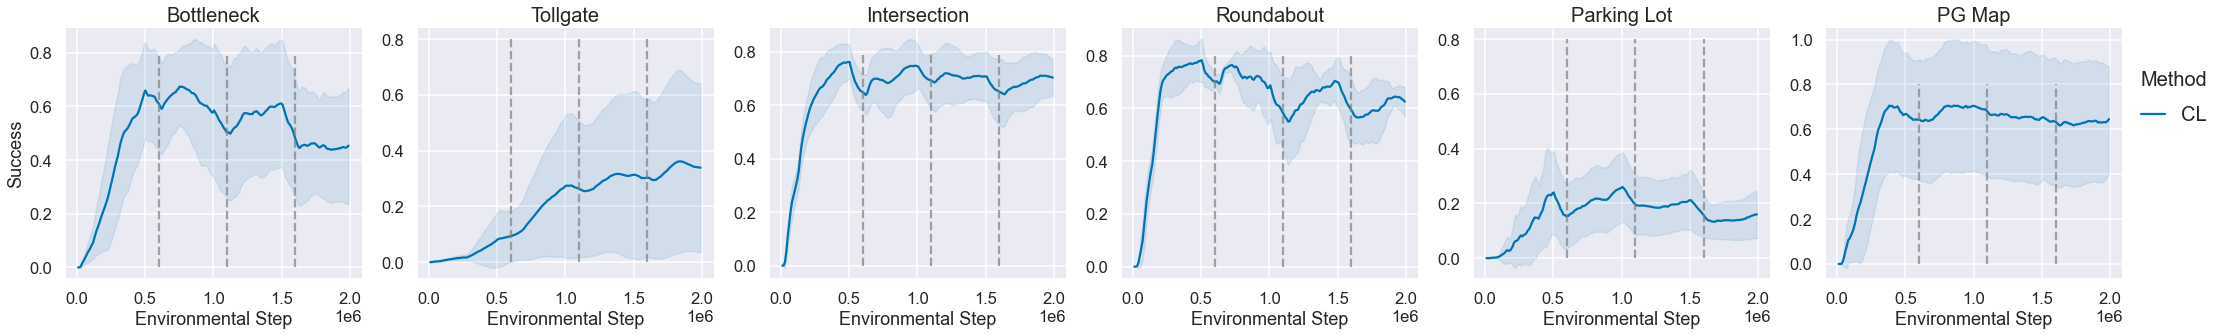

In [5]:
plot_df = data.copy()
x = "timesteps_total"
y = "success"
y_label = 'Success'

tmplist = []
for algo in ["CL"]:
    tmplist.append(plot_df[plot_df.algo == algo])
plot_df = pd.concat(tmplist)

c = sns.color_palette("colorblind")
sns.set("talk", "darkgrid")
ax = sns.relplot(
    x=x,
    y=y, 
    hue='algo',
    palette=list(c)[:len(plot_df.algo.unique())],
    data=plot_df,
    ci="sd",
    kind="line",
    col="env",
    facet_kws=dict(sharey=False, sharex=False),
    err_kws=dict(alpha=0.1),
)

for axxx in ax.axes.flat:
    axxx.set_xlabel("Environmental Step")
ax.set_ylabels(y_label)

fontsize = 20
ax.set_titles(col_template = '{col_name}', size=fontsize)
for env, axxx in ax.axes_dict.items():
    axxx.ticklabel_format(style='sci', scilimits=(0,0), axis='x')    
    axxx.plot([200_0000/4*1 + 10_0000]*2, [0, 0.8], linestyle="--", c="gray", alpha=0.7)
    axxx.plot([200_0000/4*2 + 10_0000]*2, [0, 0.8], linestyle="--", c="gray", alpha=0.7)
    axxx.plot([200_0000/4*3 + 10_0000]*2, [0, 0.8], linestyle="--", c="gray", alpha=0.7)

hs = ax.legend.legendHandles
ax.legend.set_visible(False)
plt.legend(
    handles=hs, 
    title="Method", 
   title_fontsize=fontsize, 
   bbox_to_anchor=(1., 0.9), 
   frameon=False,
   fontsize=fontsize,
   labelspacing=0.8, 
   handlelength=1.2
)

plt.savefig('cl_learning_curve.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.savefig('cl_learning_curve.png', format='png', dpi=200, bbox_inches="tight")

# Figure 2: Learning Curves

In [6]:
plot_df.algo.unique()

array(['CL'], dtype=object)

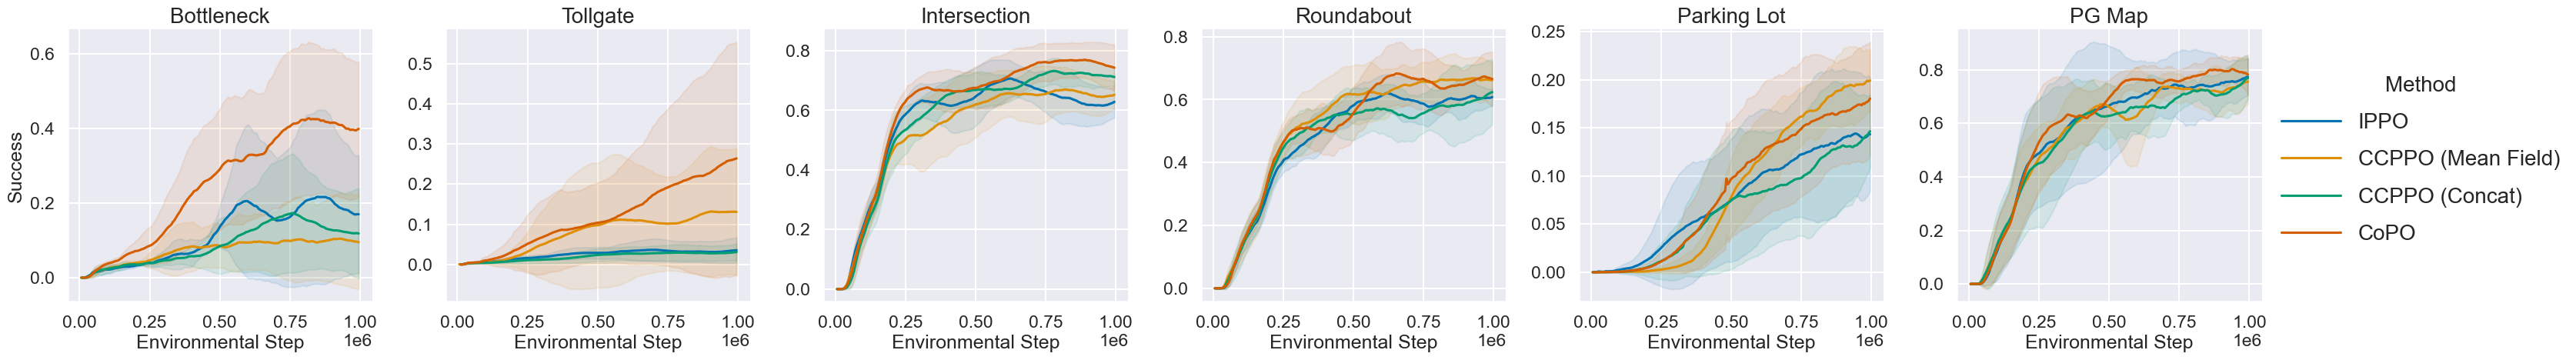

In [7]:
plot_df = data.copy()
x = "timesteps_total"
y = "success"
y_label = 'Success'

tmplist = []
for algo in ['IPPO', 'CCPPO (Mean Field)', 'CCPPO (Concat)', 'CoPO']:
    tmp = plot_df[plot_df.algo == algo]
#     tmp = tmp[tmp.timesteps_total < 100_0000]
    tmplist.append(tmp)
plot_df = pd.concat(tmplist)

c = sns.color_palette("colorblind")
sns.set("talk", "darkgrid")
ax = sns.relplot(
    x=x,
    y=y, 
    hue='algo',
#     palette=[c[0], c[2]],
    palette=list(c)[:len(plot_df.algo.unique())],
    data=plot_df,
    ci="sd",
#     legend=None,
    kind="line",
    col="env",
    facet_kws=dict(sharey=False, sharex=False),
#     linewidth=1,
#     height=5,
#     aspect=1.333,
#     facet_kws={"alpha": 0.1}
#     col_wrap=3,
    err_kws=dict(alpha=0.1),
#     linewidth=2,
#     legend=None
#     legend_out=False
#     facet_kws={"alpha": 0.2}
)

for axxx in ax.axes.flat:
    axxx.set_xlabel("Environmental Step")
ax.set_ylabels(y_label)

fontsize = 20
ax.set_titles(col_template = '{col_name}', size=fontsize)
for env, axxx in ax.axes_dict.items():
    axxx.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

hs = ax.legend.legendHandles
ax.legend.set_visible(False)
plt.legend(
    handles=hs, 
    title="Method", 
    title_fontsize=fontsize, 
    bbox_to_anchor=(1., 0.9), 
    frameon=False,
    fontsize=fontsize,
    labelspacing=0.8, 
    handlelength=2.8
)

plt.savefig('learning_curve.pdf', format='pdf', dpi=300, bbox_inches="tight")
plt.savefig('learning_curve.png', format='png', dpi=200, bbox_inches="tight")

# Table: Success rate

In [8]:
[k for k in data.keys() if "suc" in k]

['success',
 'custom_metrics/success_rate_mean',
 'custom_metrics/success_rate_min',
 'custom_metrics/success_rate_max']

In [9]:
pd.DataFrame(columns=plot_df.env.unique())

,Bottleneck,Tollgate,Intersection,Roundabout,Parking Lot,PG Map


In [10]:
data[data.algo == "CL"].timesteps_total.max()

1989957.788944724

In [11]:
plot_df = data.copy()

table_result = pd.DataFrame(columns=plot_df.env.unique())
latex_table_result = pd.DataFrame(columns=plot_df.env.unique())

for algo_name, algo_df in plot_df.groupby("algo"):
    print("\n=== Start processing algorithm: ", algo_name, " ===")
    print("Algo {} has {} trials.".format(algo_name, len(algo_df.file_name.unique())))
    
    if algo_name == "IPPO":  # We train IPPO for 500_0000 steps.
        algo_df = algo_df[algo_df.timesteps_total < 100_0000]
        
    if algo_name == "CL":  # This experiment trains CL for 200_0000 steps (50K steps for one phase).
        algo_df = algo_df[algo_df.timesteps_total > 150_0000]
    
    for env_name, env_df in algo_df.groupby("env"):
        print("Algo {}, Env {} has {} trials. (Max steps: {})".format(algo_name, env_name, len(env_df.file_name.unique()), round(env_df.timesteps_total.max(), 2)))
        
        algo_env_result = []
        
        for _, trial_df in env_df.groupby("file_name"):
            
            # PZH: At each time step, the success_rate_mean is the average success rate of
            #  recent 100 agent episodes. We take the maximal success_rate_mean across all time steps
            #  as the "success rate" of this trial.
            max_success_rate_mean = trial_df["custom_metrics/success_rate_mean"].max() * 100
            
            algo_env_result.append(max_success_rate_mean)
            
        print("Algo {}, Env {}. Success rate mean: {}, std: {}.".format(algo_name, env_name, np.mean(algo_env_result), np.std(algo_env_result)))
            
        table_result.loc[algo_name, env_name] = "{avg:.2f} ({std:.2f})".format(avg=np.mean(algo_env_result), std=np.std(algo_env_result))
        
#         latex_table_result.loc[algo_name, env_name] = "\shortstack{ %f \\\ \tiny $\pm$ %f }" % (
#             round(np.mean(algo_env_result), 2), round(np.std(algo_env_result), 2)
#         )

        latex_table_result.loc[algo_name, env_name] = "\shortstack{{ {avg:.2f} \\\ \tiny $\pm$ {std:.2f} }}".format(avg=np.mean(algo_env_result), std=np.std(algo_env_result))


=== Start processing algorithm:  CCPPO (Concat)  ===
Algo CCPPO (Concat) has 47 trials.
Algo CCPPO (Concat), Env Bottleneck has 8 trials. (Max steps: 994982.91)
Algo CCPPO (Concat), Env Bottleneck. Success rate mean: 19.546576124449487, std: 15.799358097096023.
Algo CCPPO (Concat), Env Intersection has 8 trials. (Max steps: 994982.91)
Algo CCPPO (Concat), Env Intersection. Success rate mean: 75.66779323171224, std: 3.1804652235934308.
Algo CCPPO (Concat), Env PG Map has 8 trials. (Max steps: 994982.91)
Algo CCPPO (Concat), Env PG Map. Success rate mean: 80.20696345616048, std: 3.581484505240079.
Algo CCPPO (Concat), Env Parking Lot has 8 trials. (Max steps: 994982.91)
Algo CCPPO (Concat), Env Parking Lot. Success rate mean: 12.005888945328689, std: 7.5237073896779.
Algo CCPPO (Concat), Env Roundabout has 8 trials. (Max steps: 994982.91)
Algo CCPPO (Concat), Env Roundabout. Success rate mean: 67.81650929987296, std: 4.0922759902101085.
Algo CCPPO (Concat), Env Tollgate has 7 trials. (M

In [12]:
table_result

,Bottleneck,Tollgate,Intersection,Roundabout,Parking Lot,PG Map
CCPPO (Concat),19.55 (15.80),3.53 (1.92),75.67 (3.18),67.82 (4.09),12.01 (7.52),80.21 (3.58)
CCPPO (Mean Field),14.60 (11.24),14.86 (16.47),70.79 (6.29),71.03 (5.45),20.66 (3.47),79.56 (3.92)
CL,60.60 (22.18),37.29 (30.65),75.68 (6.24),72.28 (5.45),21.26 (10.15),71.16 (23.69)
CoPO,47.39 (19.49),27.19 (25.63),79.47 (4.97),72.82 (6.73),19.51 (5.59),83.40 (3.13)
IPPO,24.04 (18.74),4.41 (2.56),71.91 (5.27),66.43 (4.99),16.98 (5.90),81.81 (6.50)


In [13]:
print(table_result.to_markdown())

|                    | Bottleneck    | Tollgate      | Intersection   | Roundabout   | Parking Lot   | PG Map        |
|:-------------------|:--------------|:--------------|:---------------|:-------------|:--------------|:--------------|
| CCPPO (Concat)     | 19.55 (15.80) | 3.53 (1.92)   | 75.67 (3.18)   | 67.82 (4.09) | 12.01 (7.52)  | 80.21 (3.58)  |
| CCPPO (Mean Field) | 14.60 (11.24) | 14.86 (16.47) | 70.79 (6.29)   | 71.03 (5.45) | 20.66 (3.47)  | 79.56 (3.92)  |
| CL                 | 60.60 (22.18) | 37.29 (30.65) | 75.68 (6.24)   | 72.28 (5.45) | 21.26 (10.15) | 71.16 (23.69) |
| CoPO               | 47.39 (19.49) | 27.19 (25.63) | 79.47 (4.97)   | 72.82 (6.73) | 19.51 (5.59)  | 83.40 (3.13)  |
| IPPO               | 24.04 (18.74) | 4.41 (2.56)   | 71.91 (5.27)   | 66.43 (4.99) | 16.98 (5.90)  | 81.81 (6.50)  |


In [14]:
print(latex_table_result.to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
{} &                                 Bottleneck &                                   Tollgate &                              Intersection &                                Roundabout &                                Parking Lot &                                     PG Map \\
\midrule
CCPPO (Concat)     &  \shortstack{ 19.55 \\ \tiny $\pm$ 15.80 } &    \shortstack{ 3.53 \\ \tiny $\pm$ 1.92 } &  \shortstack{ 75.67 \\ \tiny $\pm$ 3.18 } &  \shortstack{ 67.82 \\ \tiny $\pm$ 4.09 } &   \shortstack{ 12.01 \\ \tiny $\pm$ 7.52 } &   \shortstack{ 80.21 \\ \tiny $\pm$ 3.58 } \\
CCPPO (Mean Field) &  \shortstack{ 14.60 \\ \tiny $\pm$ 11.24 } &  \shortstack{ 14.86 \\ \tiny $\pm$ 16.47 } &  \shortstack{ 70.79 \\ \tiny $\pm$ 6.29 } &  \shortstack{ 71.03 \\ \tiny $\pm$ 5.45 } &   \shortstack{ 20.66 \\ \tiny $\pm$ 3.47 } &   \shortstack{ 79.56 \\ \tiny $\pm$ 3.92 } \\
CL                 &  \shortstack{ 60.60 \\ \tiny $\pm$ 22.18 } &  \shortstack{ 37.29 \\ \tiny $\pm$ 30